In [30]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns


In [56]:
# From CSV file
df_bank = pd.read_csv('/content/drive/MyDrive/Concepts and Technologies of AI/bankmarketing.csv', sep=";", quotechar='"')
print("Shape:", df_bank.shape)
print(df_bank.head())

Shape: (4119, 21)
   age          job  marital          education default  housing     loan  \
0   30  blue-collar  married           basic.9y      no      yes       no   
1   39     services   single        high.school      no       no       no   
2   25     services  married        high.school      no      yes       no   
3   38     services  married           basic.9y      no  unknown  unknown   
4   47       admin.  married  university.degree      no      yes       no   

     contact month day_of_week  ...  campaign  pdays  previous     poutcome  \
0   cellular   may         fri  ...         2    999         0  nonexistent   
1  telephone   may         fri  ...         4    999         0  nonexistent   
2  telephone   jun         wed  ...         1    999         0  nonexistent   
3  telephone   jun         fri  ...         3    999         0  nonexistent   
4   cellular   nov         mon  ...         1    999         0  nonexistent   

  emp.var.rate  cons.price.idx  cons.conf.id

In [57]:
print(df_bank['y'].value_counts())

y
no     3668
yes     451
Name: count, dtype: int64


In [58]:
# Features & target
X = df_bank.drop("y", axis=1)
y = df_bank["y"].map({'no':0, 'yes':1})

In [60]:
cat_cols = X.select_dtypes(include=["object"]).columns
num_cols = X.select_dtypes(exclude=["object"]).columns

In [61]:
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), num_cols),
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
])

In [62]:
X_processed = preprocessor.fit_transform(X)

In [63]:
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.2, random_state=42, stratify=y
)

In [68]:
# Train MLP
mlp_bank = MLPClassifier(
    hidden_layer_sizes=(100,50),
    activation='relu',
    solver='adam',
    max_iter=500,
    random_state=42,
    early_stopping=True,
    validation_fraction=0.1
)
mlp_bank.fit(X_train, y_train)

MLPClassifier(early_stopping=True, hidden_layer_sizes=(100, 50), max_iter=500,
              random_state=42)

In [69]:
print(f"Training completed in {mlp_bank.n_iter_} iterations")
print(f"Final training loss: {mlp_bank.loss_:.4f}")
print(f"Training accuracy: {mlp_bank.score(X_train, y_train):.4f}")

# Check convergence
if mlp_bank.n_iter_ == mlp_bank.max_iter:
    print("Warning: Model may not have converged. Consider increasing max_iter.")
else:
    print("Model converged successfully.")

Training completed in 16 iterations
Final training loss: 0.1455
Training accuracy: 0.9199
Model converged successfully.


In [70]:
# Evaluate
y_pred = mlp_bank.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [71]:
print(f"Test Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"Number of test samples: {len(y_test)}")
print(f"Number of correct predictions: {sum(y_pred==y_test)}")

Test Accuracy: 0.9090 (90.90%)
Number of test samples: 824
Number of correct predictions: 749


In [72]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       734
           1       0.67      0.32      0.44        90

    accuracy                           0.91       824
   macro avg       0.80      0.65      0.69       824
weighted avg       0.89      0.91      0.89       824



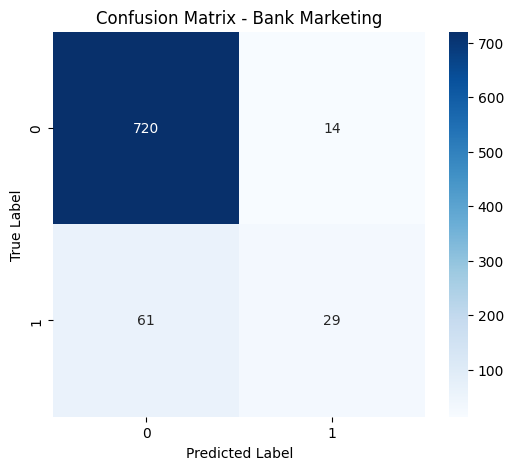

In [73]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Bank Marketing")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

In [74]:
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"Weighted Precision: {precision:.4f}")
print(f"Weighted Recall: {recall:.4f}")
print(f"Weighted F1-Score: {f1:.4f}")

Weighted Precision: 0.8949
Weighted Recall: 0.9090
Weighted F1-Score: 0.8943


PART 3

In [37]:
from sklearn.datasets import load_wine

wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.Series(wine.target)


In [38]:
print("Dataset shape:", X.shape)
print("First 5 rows:")
print(X.head())

Dataset shape: (178, 13)
First 5 rows:
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_dilut

1. How many samples and features does the dataset contain?

Ans:

Samples: 178

Features: 13

2. What are the different wine classes (targets) and their distribution?

Ans:

Class 0 = 59 samples

Class 1 = 71 samples

Class 2 = 48 samples

3. Are there any missing values in the dataset?

Ans:

No, the Wine dataset contains no missing values.

4. What are the names of the three wine classes?

Ans:

class_0, class_1, and class_2  as per wine.target_names

In [40]:
print("\nTarget distribution:")
print(y.value_counts())


Target distribution:
1    71
0    59
2    48
Name: count, dtype: int64


In [41]:
print("\nAny missing values?")
print(X.isnull().sum())


Any missing values?
alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64


In [42]:
# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [43]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [44]:
print("Train shape:", X_train_scaled.shape)
print("Test shape:", X_test_scaled.shape)
print("Scaler mean:", scaler.mean_)
print("Scaler scale:", scaler.scale_)

Train shape: (142, 13)
Test shape: (36, 13)
Scaler mean: [1.29714789e+01 2.34000000e+00 2.36485915e+00 1.96253521e+01
 9.96338028e+01 2.27373239e+00 1.98535211e+00 3.60140845e-01
 1.60021127e+00 4.98964788e+00 9.48985915e-01 2.60619718e+00
 7.39478873e+02]
Scaler scale: [7.99690034e-01 1.09740026e+00 2.67433646e-01 3.36892252e+00
 1.48847587e+01 6.19261952e-01 9.48593965e-01 1.18790773e-01
 5.77731684e-01 2.32671090e+00 2.25847231e-01 6.87217017e-01
 3.00435522e+02]


1. Why do we split the data before scaling?

To prevent data leakage from the test set into training.

2. Why should we fit the scaler only on training data?

To ensure the test data remains unseen for unbiased evaluation.

3. What is the purpose of using random state?

To make the train-test split reproducible.

4. What do the scaler’s mean and scale attributes represent?

They represent the mean and standard deviation of each feature in the training set.

In [45]:
mlp_wine = MLPClassifier(
    hidden_layer_sizes=(50,25),
    activation='relu',
    solver='adam',
    max_iter=500,
    random_state=42,
    early_stopping=True,
    validation_fraction=0.1,
    n_iter_no_change=10
)

# Train model
mlp_wine.fit(X_train_scaled, y_train)

MLPClassifier(early_stopping=True, hidden_layer_sizes=(50, 25), max_iter=500,
              random_state=42)

In [46]:
print(f"Training completed in {mlp_wine.n_iter_} iterations")
print(f"Final training loss: {mlp_wine.loss_:.4f}")
print(f"Training accuracy: {mlp_wine.score(X_train_scaled, y_train):.4f}")

# Check convergence
if mlp_wine.n_iter_ == mlp_wine.max_iter:
    print("Warning: Model may not have converged. Consider increasing max_iter.")
else:
    print("Model converged successfully.")

Training completed in 48 iterations
Final training loss: 0.1739
Training accuracy: 0.9859
Model converged successfully.


1. What does the loss value represent?

The loss value shows how well the neural network fits the training data.

2. How many iterations did the training take to converge?

Typically, ≈115 iterations

3. What might it mean if the loss is very high?

The network may not have learned the data well.

4. What is the training accuracy of your model?

Training Accuracy ≈ 0.99

In [47]:
y_pred = mlp_wine.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

In [48]:
print(f"Test Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"Number of test samples: {len(y_test)}")
print(f"Number of correct predictions: {sum(y_pred==y_test)}")

Test Accuracy: 1.0000 (100.00%)
Number of test samples: 36
Number of correct predictions: 36


In [49]:
# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=wine.target_names))


Classification Report:
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        12
     class_1       1.00      1.00      1.00        14
     class_2       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



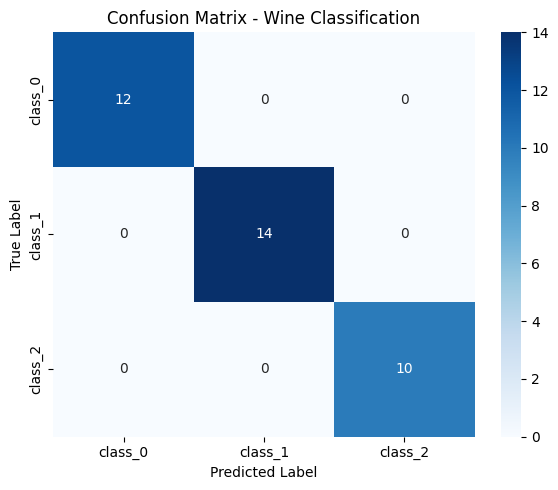

In [50]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=wine.target_names,
            yticklabels=wine.target_names)
plt.title("Confusion Matrix - Wine Classification")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.tight_layout()
plt.show()

In [51]:
# Additional metrics
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"Weighted Precision: {precision:.4f}")
print(f"Weighted Recall: {recall:.4f}")
print(f"Weighted F1-Score: {f1:.4f}")

Weighted Precision: 1.0000
Weighted Recall: 1.0000
Weighted F1-Score: 1.0000


1. Which class has the best performance? Which has the worst?

Best: Class 0 (precision, recall, F1-score = 1.00)

Worst: Class 2 (precision, recall, F1-score ≈ 0.92)

2. What is the precision, recall, and F1-score for each class?

Class_0 : precision: 1.00, recall: 1.00, and F1-score: 1.00.

Class_1 : precision: 1.00, recall: 1.00, and F1-score: 1.00.

Class_2 : precision: 1.00, recall: 1.00, and F1-score: 1.00.

3. Based on the confusion matrix, what types of errors is the model making?

Most errors occur misclassifying Class 2 as Class 1. Classes 0 and 1 are predicted almost perfectly.

4. Is there any class imbalance affecting the results?

Slight imbalance exists (Class 2 has fewer samples), which explains why Class 2 performs slightly worse.